# Exploración de datos

In [7]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# carga de la data
df_impagos = pd.read_csv('../Datos/Crudos/Loan_default.csv')
print(df_impagos.shape)
df_impagos.head()

(255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [9]:
# Resumen
df_impagos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [10]:
# Eliminación columna LoanID
df_impagos.drop(columns=['LoanID'], inplace=True)

# Tipos de variables
print(df_impagos.dtypes.value_counts())

int64      8
object     7
float64    2
Name: count, dtype: int64


In [11]:
# Cantidad de valores únicos de las variables categóricas
categoricas = df_impagos.select_dtypes(include=['object']).astype('str')
for columna in categoricas.columns:
    print('* '*3, categoricas[columna].value_counts())
    print('-' * 40)

* * *  Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
----------------------------------------
* * *  EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
----------------------------------------
* * *  MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
----------------------------------------
* * *  HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64
----------------------------------------
* * *  HasDependents
Yes    127742
No     127605
Name: count, dtype: int64
----------------------------------------
* * *  LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64
----------------------------------------
* * *  HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64
-------------------------

Default
0    225694
1     29653
Name: count, dtype: int64


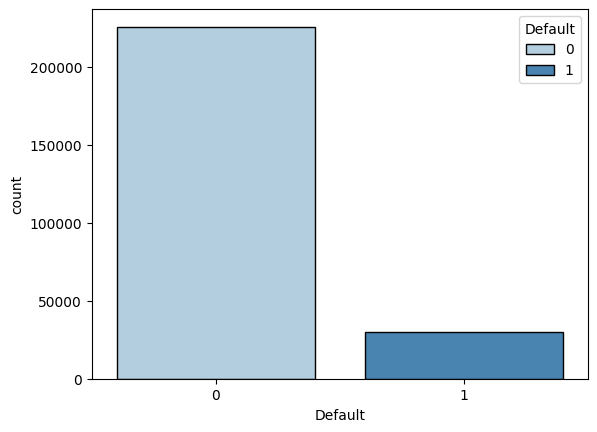

In [12]:
# Balance de la variable objetivo
print(df_impagos['Default'].value_counts())
sns.countplot(data=df_impagos, x='Default', hue='Default', palette='Blues', edgecolor='black')
plt.show();

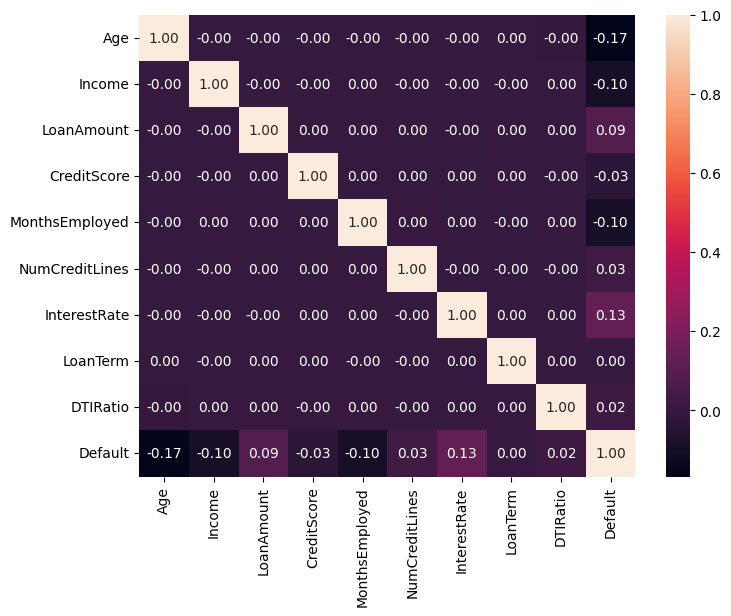

In [27]:
# Correlación de las variables numéricas
variables_num = df_impagos.select_dtypes(include='number')
correlacion = variables_num.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlacion, annot=True, fmt='.2f');